<a href="https://colab.research.google.com/github/adudjk/EXTC-Engg-Labs/blob/main/Gaussian_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving noisysalterpepper.png to noisysalterpepper (1).png


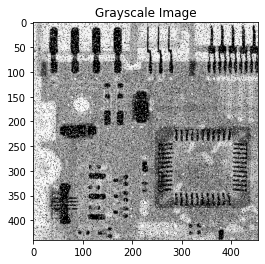

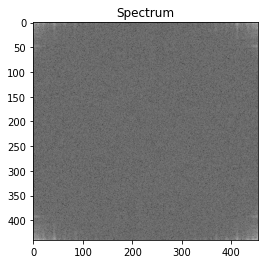

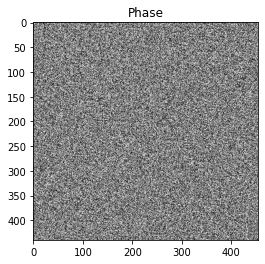

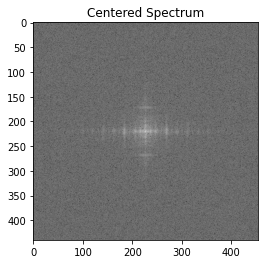

In [ ]:
from skimage.io import imread
import scipy.fftpack as fp
from math import sqrt,exp
from io import BytesIO

import numpy as np                        # library used for working with arrays
import matplotlib.pylab as plt                 # library used for ploting, graph
import cv2                     # library for Open Source Computer vision library
from PIL import Image       # Python Imaging Library for load, display, save etc
from google.colab import files
files.upload()les

img = cv2.imread("text.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap=plt.cm.gray)

plt.show()

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img = cv2.imread("text.jpeg", 0)

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img = cv2.imread("text.jpeg", 0)

original = np.fft.fft2(img)
plt.subplot(121), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(122), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2) #calculating the euclidean distance

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) <= D0:
               base[y,x] = exp(-1*(distance((y,x),center)**2/2/D0**2)) #formula for gaussian filter
            else :
              base[y,x] = 0
    return base

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("text.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = 1 - idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("High Pass Filter")

LowPassCenter = center *(1- idealFilterHP(50,img.shape))
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")
plt.show()

# LOW PASS

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("text.jpeg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("Low Pass Filter")

HighPassCenter =  center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()